In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# load data into pandas dataframe
adx_data = pd.read_csv('Q4_ADX_Sample_data.csv')
adx_data.head()

,date,pub_id,app_id,ad_unit_code,country,requests,ae_responses,ae_impressions,ae_clicks,ae_revenue
0,2022-10-20,1987,16243270,22832846443,Tanzania,36,36,34,0,0.035738
1,2022-10-20,1987,16243270,22832846593,Tanzania,24,24,23,0,0.064384
2,2022-10-20,1987,16243270,22832846443,Thailand,949,949,876,20,4.943878
3,2022-10-20,1987,16243270,22832846593,Thailand,1006,907,688,134,24.226836
4,2022-10-20,1987,16243270,22832827729,Thailand,373,287,156,20,2.759392


In [9]:
adx_data.columns

Index(['date', 'pub_id', 'app_id', 'ad_unit_code', 'country', 'requests',
       'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue'],
      dtype='object')

In [3]:
# check for missing values and data inconsistencies
adx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47935 entries, 0 to 47934
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            47935 non-null  object 
 1   pub_id          47935 non-null  int64  
 2   app_id          47935 non-null  int64  
 3   ad_unit_code    47935 non-null  int64  
 4   country         47515 non-null  object 
 5   requests        47935 non-null  int64  
 6   ae_responses    47935 non-null  int64  
 7   ae_impressions  47935 non-null  int64  
 8   ae_clicks       47935 non-null  int64  
 9   ae_revenue      47935 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 3.7+ MB


In [4]:
# drop rows with missing values
adx_data.dropna(inplace=True)


In [10]:
# handle data inconsistencies
adx_data['ae_responses'] = np.where(adx_data['ae_responses'] < adx_data['ae_impressions'], adx_data['ae_impressions'], adx_data['ae_responses'])
adx_data['ae_revenue'] = np.where(adx_data['ae_revenue'] < 0, 0, adx_data['ae_revenue'])

In [11]:
# compute additional metrics
adx_data['show_rate'] = adx_data['ae_impressions'] / adx_data['ae_responses']
adx_data['click_rate'] = adx_data['ae_clicks'] / adx_data['ae_impressions']

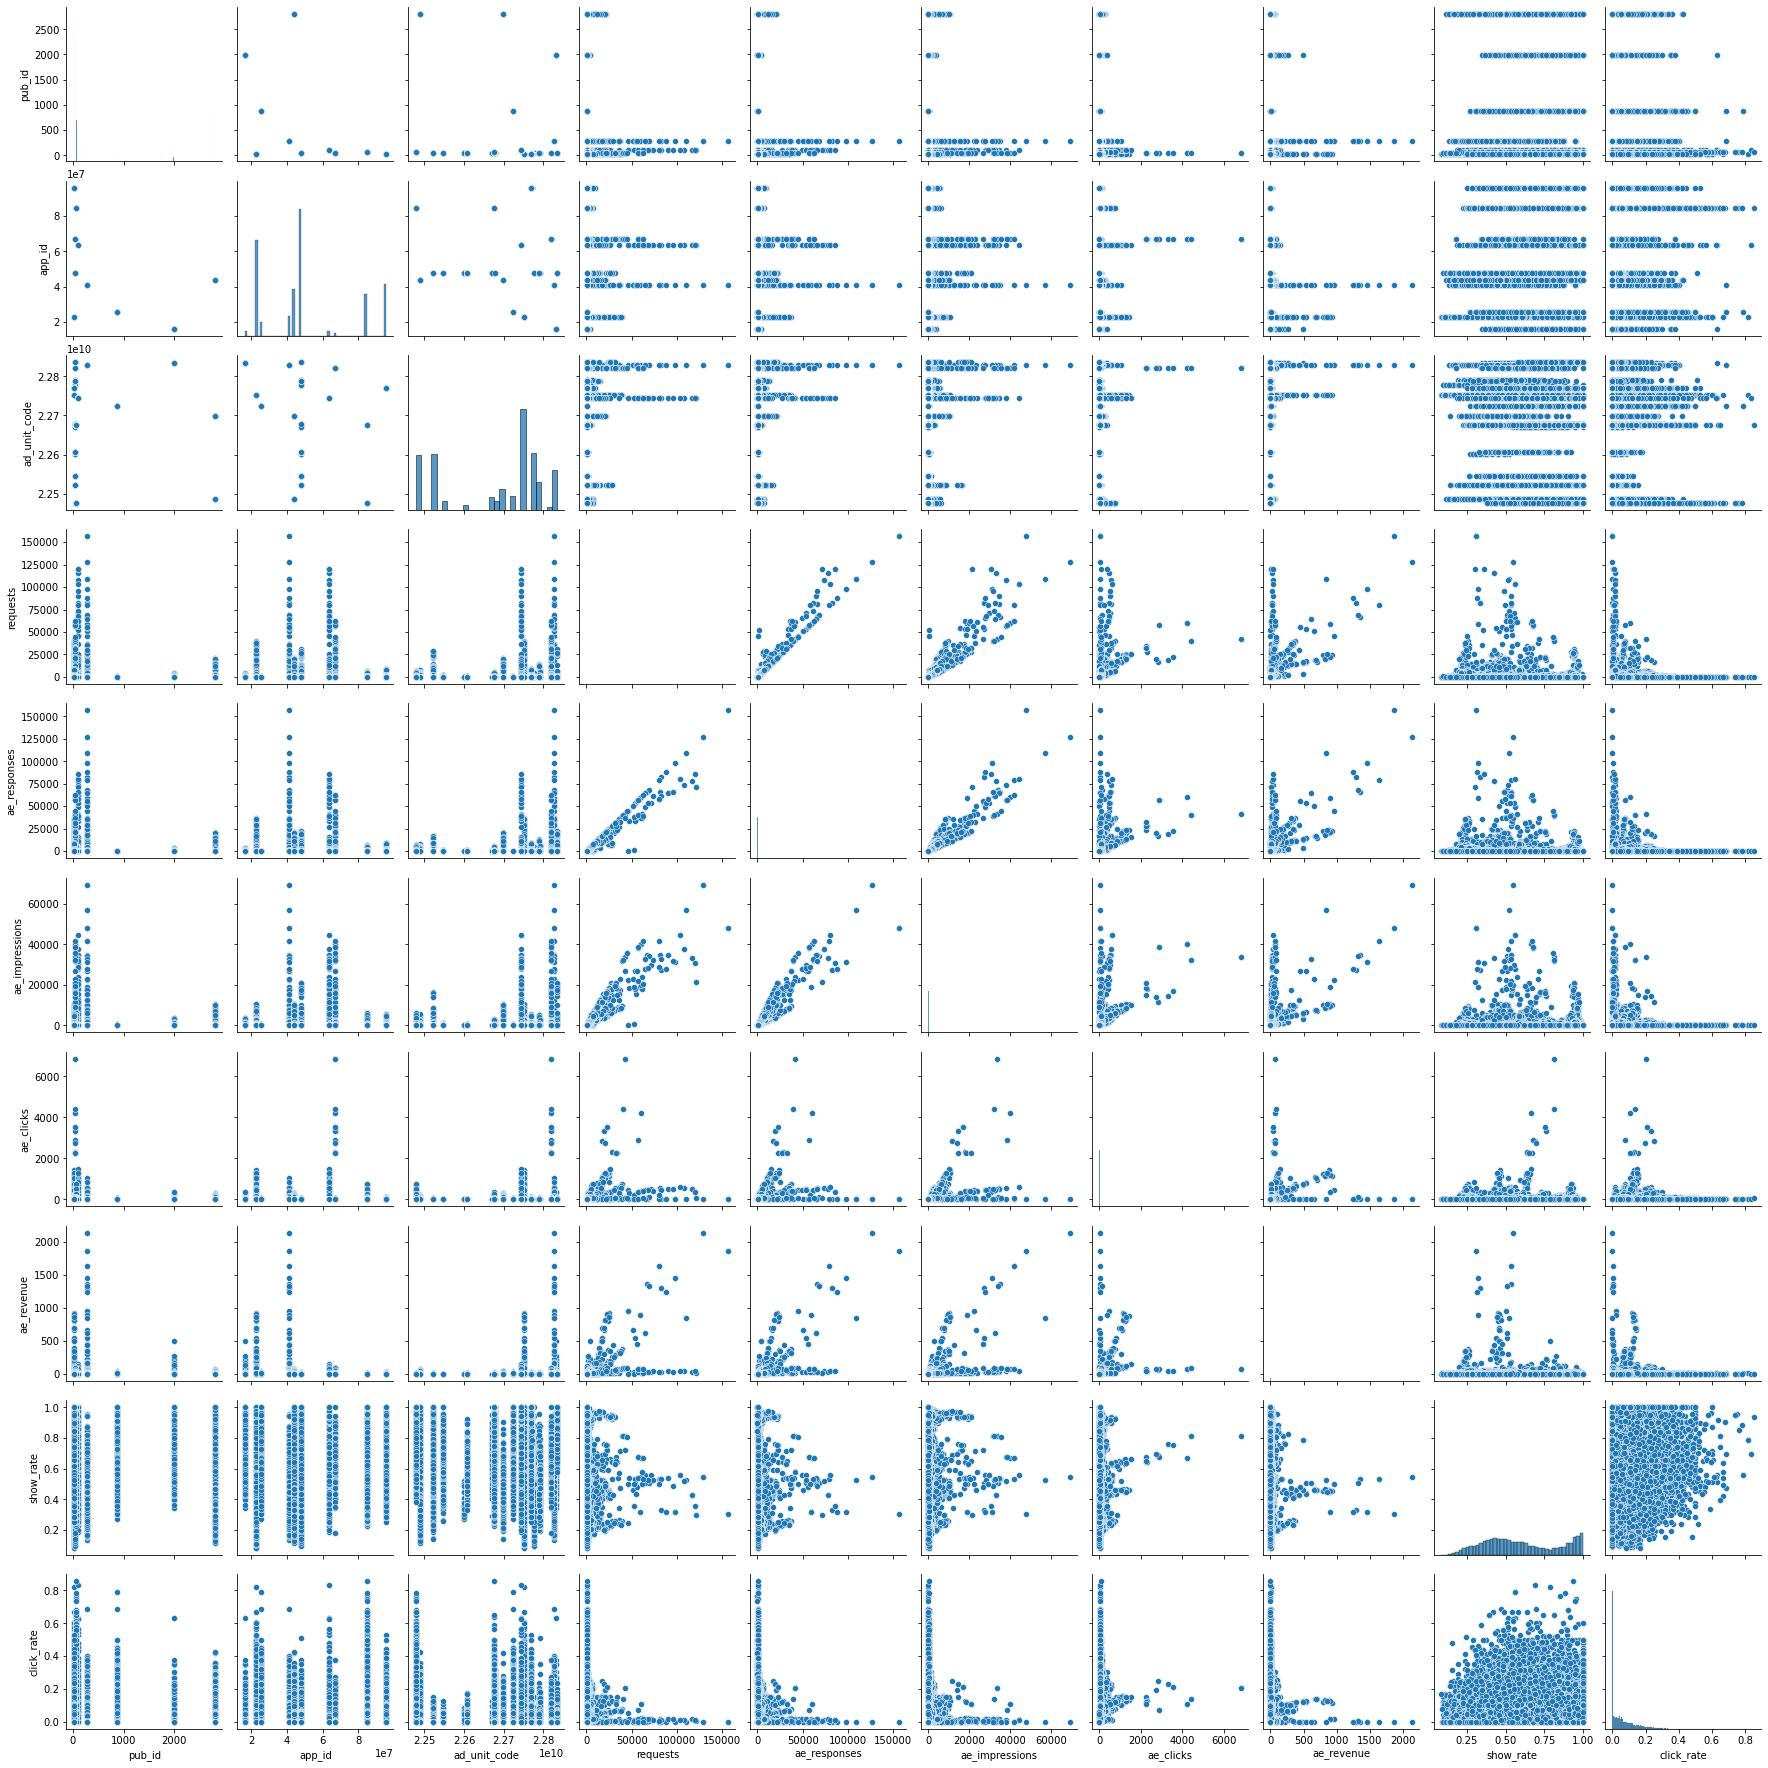

In [12]:
# perform exploratory data analysis
sns.pairplot(adx_data)
plt.show()

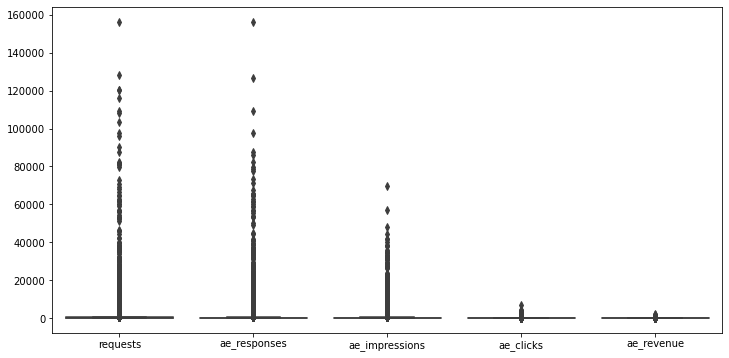

In [14]:
# identify any outliers using boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=adx_data[['requests', 'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue']])
plt.show()


In [16]:
#useing the z-score to identify any data points that are more than 3 standard deviations from the mean
z_scores = (adx_data[['requests', 'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue']] - adx_data[['requests', 'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue']].mean()) / adx_data[['requests', 'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue']].std()
anomalies = adx_data[(z_scores.abs() > 3).any(axis=1)]
print(anomalies)


             date  pub_id    app_id  ad_unit_code        country  requests  \
42     2022-10-25    1987  16243270   22832846593  United States       533   
61     2022-10-21    1987  16243270   22832846593       Thailand      1864   
62     2022-10-21    1987  16243270   22832846593  United States       839   
125    2022-10-27    1987  16243270   22832846593  United States      1324   
171    2022-10-23    1987  16243270   22832846593       Thailand      2178   
...           ...     ...       ...           ...            ...       ...   
46411  2022-10-24      14  95674771   22770341430          India      7421   
46828  2022-10-26      14  95674771   22770341430          India      8117   
47238  2022-10-06      14  95674771   22770341430          India      8057   
47397  2022-10-28      14  95674771   22770341430          India      9117   
47780  2022-10-22      14  95674771   22770341430          India      7532   

       ae_responses  ae_impressions  ae_clicks  ae_revenue  sho

In [17]:
# Select the columns for the anomalies
anomaly_columns = ['requests', 'ae_responses', 'ae_impressions', 'ae_clicks', 'ae_revenue']


In [18]:
# Filter the data for the anomalies only
anomalies_data = adx_data.loc[anomalies.index][anomaly_columns]

<AxesSubplot:>

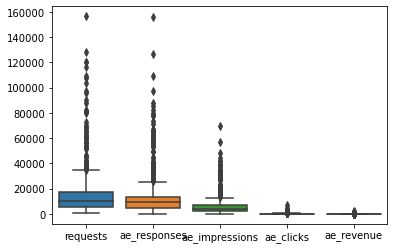

In [20]:
# Plot the distribution of the anomaly data using a boxplot
sns.boxplot(data=anomalies_data)

In [21]:
# Show the descriptive statistics for the anomaly data
print(anomalies_data.describe())

            requests   ae_responses  ae_impressions    ae_clicks   ae_revenue
count     733.000000     733.000000      733.000000   733.000000   733.000000
mean    15500.774898   13136.141883     6656.446112   309.665757    76.854605
std     18231.601867   15550.682478     7824.717497   488.285840   209.982036
min       533.000000     153.000000       38.000000     0.000000     0.023818
25%      5204.000000    4755.000000     2475.000000    67.000000     3.210746
50%     10459.000000    9220.000000     4234.000000   232.000000    14.643863
75%     17065.000000   13201.000000     6849.000000   367.000000    42.735635
max    156435.000000  156296.000000    69448.000000  6853.000000  2137.181915
